# Data Importing

In [ ]:
#Change your own key!
api_token = {"username":"srhgccc","key":"41c36ccc1ee7bc07f70e459ccbf7df7c"}
import json
import zipfile
import os
 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')

In [ ]:
!kaggle datasets download -d srhgccc/dataset

 88% 76.0M/86.6M [00:05<00:00, 12.4MB/s]
100% 86.6M/86.6M [00:05<00:00, 15.3MB/s]


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: label.csv               
  inflating: training/02a91mzn84.jpg  
  inflating: training/02nehv1tf6.jpg  
  inflating: training/02sx9ijfd6.jpg  
  inflating: training/032p7z15ol.jpg  
  inflating: training/03jezhu9i8.jpg  
  inflating: training/03ol9zqjn7.jpg  
  inflating: training/04d6xbohpg.jpg  
  inflating: training/04kxsd2rf9.jpg  
  inflating: training/05tdemvcqx.jpg  
  inflating: training/06uasyi3nt.jpg  
  inflating: training/07ufd3njrv.jpg  
  inflating: training/07uqc9hdnt.jpg  
  inflating: training/084dzytmfe.jpg  
  inflating: training/09de32ybos.jpg  
  inflating: training/0a1h7votc5.jpg  
  inflating: training/0a7yscrh49.jpg  
  inflating: training/0clzd3aqyg.jpg  
  inflating: training/0cwbio2hfn.jpg  
  inflating: training/0d9ucgfmy6.jpg  
  inflating: training/0dhgmwk8ri.jpg  
  inflating: training/0dwec2hx45.jpg  
  inflating: training/0e1u74idof.jpg  
  inflating: training/0eac5fkrg6.jpg  
  inflating: training/0evyz4ogbj.jpg  
  in

# Data Preprocessing


In [ ]:
import os
import pandas as pd
dir = 'training/'
category = os.listdir(dir)
print(category)

['dfix4s68k1.jpg', '9oq2agxm46.jpg', '0vo6mh4bi5.jpg', 'dmnkrj3wsy.jpg', '4keqwaotvy.jpg', 'cmxpdeq2y0.jpg', '8borky4jvf.jpg', 'n58zrgfm1e.jpg', 'shrd4c8pou.jpg', '4nwgzrseim.jpg', 'it3s850frc.jpg', 'ld1ic9r84g.jpg', 'g3dm80ihl1.jpg', 'nvt6c30p9e.jpg', '7ugpqotjzc.jpg', 'ztbxuh3c05.jpg', '6acfjyq9d1.jpg', 's487lo05n2.jpg', 'cxwrq10mal.jpg', 'lzrafugvc9.jpg', '7ugfpnqvk3.jpg', 'nmcjeovyh0.jpg', 'igw1dypaot.jpg', 'nzq72tp01f.jpg', 'kqx3vzt0d1.jpg', 'v8r0iotj7s.jpg', '67fmhwzi3n.jpg', '43tozprjky.jpg', '3yqn097hfv.jpg', '9lcrqfjb5h.jpg', 'oxrhmn7s9g.jpg', 'l741euagmb.jpg', 'utnpwb4oc1.jpg', 'l1m7kny389.jpg', 'ioh62pzxwt.jpg', 'y7n9rut2sc.jpg', '6sp0wd7hk3.jpg', 'ov1gh4qdpk.jpg', 'uav73jnzq8.jpg', '3pe0du57w2.jpg', 'd7qktgcmp0.jpg', 'macyh4zvdb.jpg', 'pcwxgk572u.jpg', '0ja1dvs6gf.jpg', '2dhpo9n1g4.jpg', 'crbfd3hi0o.jpg', 'debpqcmr2j.jpg', 'qtb85i3wfx.jpg', 'uiw20z98n5.jpg', '16hyv9mz8g.jpg', 'ocxytn405s.jpg', 'c2a4j8yp50.jpg', 'wsgdbiz3ku.jpg', 'tla2wv5u9o.jpg', 'ervm2c3sgw.jpg', '3bje5my9

In [ ]:
label = pd.read_csv('label.csv')

In [ ]:
label.head()

,filename,category
0,me3uqlixjn.jpg,0
1,5c0vsrdtpq.jpg,0
2,swixut5b3l.jpg,0
3,m0eqa926lo.jpg,0
4,5jr6x2y9p8.jpg,0


In [ ]:
X=[]
Z=[]

IMG_SIZE=100

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
  path = DIR
  img = cv2.imread(path)
  img = img[:, :, [2,1,0]]
  img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
  X.append(np.array(img))
  Z.append(flower_type)

# Sample Increasing

In [ ]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

for j in tqdm(range(len(label))):
  make_train_data(label['category'][j], dir + label['filename'][j])

100%|██████████| 2190/2190 [00:21<00:00, 104.14it/s]


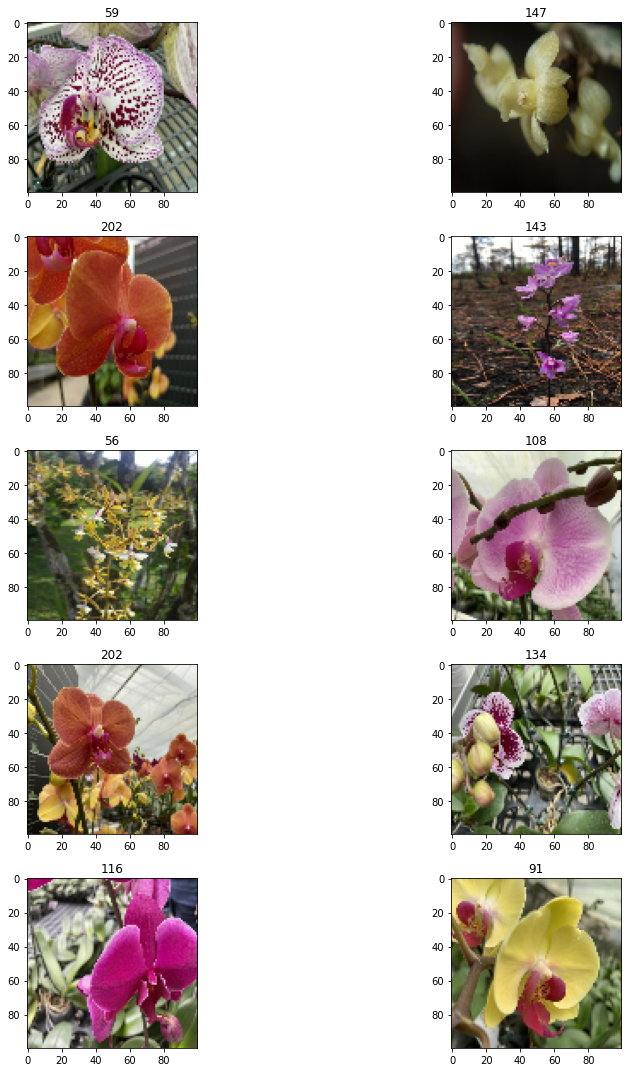

In [ ]:
# Show Samples
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import itertools
import random as rn

fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l = rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(Z[l])
        
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,len(set(Z)))
X=np.array(X)
X=X/255

In [ ]:
X.shape

(2190, 100, 100, 3)

In [ ]:
Y.shape

(2190, 219)

In [ ]:
temp = label['category']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12345, stratify=pd.DataFrame(temp))

# More Images Generation

In [ ]:
# load package
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    fill_mode='nearest')

datagen.fit(x_train)

# CNN Model Building

In [ ]:
# Define the model architecture
inputs = keras.Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(len(set(Z)), activation='softmax')(x)

# Define inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 128)       3699

# Model Training with Label Smoothing

In [ ]:
# Compile the model
# Introducing label smoothing to prevent overfitting
def label_smoothing(y_true,y_pred):  
     return tf.keras.losses.categorical_crossentropy(y_true,y_pred,label_smoothing=0.5)

In [ ]:
batch_size=128
epochs=300

model.compile(
      loss=label_smoothing,
      optimizer='adam',
      metrics=['accuracy'])
History = model.fit(datagen.flow(x_train, y_train), validation_data = datagen.flow(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, 
                    steps_per_epoch=len(x_train)//batch_size)

Epoch 1/300
13/13 [==============================] - 4s 187ms/step - loss: 5.6297 - accuracy: 0.0024 - val_loss: 5.3897 - val_accuracy: 0.0046
Epoch 2/300
13/13 [==============================] - 2s 161ms/step - loss: 5.5831 - accuracy: 0.0072 - val_loss: 5.3910 - val_accuracy: 0.0046
Epoch 3/300
13/13 [==============================] - 2s 159ms/step - loss: 5.5536 - accuracy: 0.0168 - val_loss: 5.3933 - val_accuracy: 0.0046
Epoch 4/300
13/13 [==============================] - 2s 162ms/step - loss: 5.5538 - accuracy: 0.0024 - val_loss: 5.3964 - val_accuracy: 0.0046
Epoch 5/300
13/13 [==============================] - 2s 160ms/step - loss: 5.4725 - accuracy: 0.0098 - val_loss: 5.3999 - val_accuracy: 0.0046
Epoch 6/300
13/13 [==============================] - 2s 159ms/step - loss: 5.4640 - accuracy: 0.0168 - val_loss: 5.4013 - val_accuracy: 0.0046
Epoch 7/300
13/13 [==============================] - 2s 161ms/step - loss: 5.4736 - accuracy: 0.0096 - val_loss: 5.4035 - val_accuracy: 0.0046

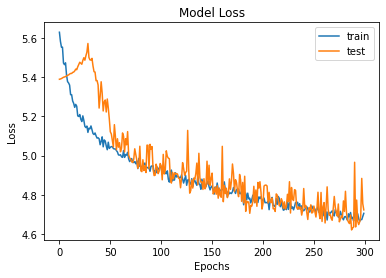

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

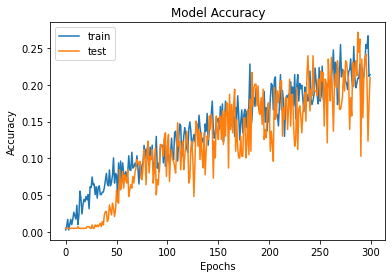

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Performance Checking

In [ ]:
predictions = model.predict(x_test)
predicted_class = np.argmax(predictions, axis=1)
Y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, predicted_class))

accuracy = accuracy_score(Y_test, predicted_class)
print('\nAccuracy:{}'.format(accuracy))

a = f1_score(Y_test, predicted_class, average='macro')
b = f1_score(Y_test, predicted_class, average='micro')
c = f1_score(Y_test, predicted_class, average='weighted')
print('\nf1_score_macro:{}'.format(a))
print('\nf1_score_micro:{}'.format(b))
print('\nf1_score_weighted:{}'.format(c))
del a, b, c

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]

Accuracy:0.20319634703196346

f1_score_macro:0.15245560241531234

f1_score_micro:0.20319634703196346

f1_score_weighted:0.15245560241531234
